# Dynamic Time Warping

## Files and Data
#### ground-truth folder
Contains ground truth data.


#### transcription.txt  
- XXX-YY-ZZ: XXX = Document Number, YY = Line Number, ZZ = Word Number
- Contains the character-wise transcription of the word (letters seperated with dashes)
- Special characters denoted with s_
	- numbers (s_x)
	- punctuation (s_pt, s_cm, ...)
	- strong s (s_s)
	- hyphen (s_mi)
	- semicolon (s_sq)
	- apostrophe (s_qt)
	- colon (s_qo)
    
### Task
Three files:  
##### training and test data:
train.txt, valid.txt
both contain a list of documents
##### keywords that are at least once in the training and validation set defined by train.txt and valid.txt
keywords.txt



In [68]:
import numpy as np
from matplotlib import pyplot as plt
import PIL
import cv2
import os

In [69]:
IMAGES_PATH = "./word-images/"
DIRS = sorted([name for name in os.listdir(IMAGES_PATH)])

#Testing
print(DIRS)

['270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '300', '301', '302', '303', '304']


In [70]:
# returns list of numpy arrays with the pixel values
def import_images():
    images = list()
    id_ = 0
    for folder in DIRS:
        img_paths = IMAGES_PATH + folder
        # this sorts png files in the numerical order rather then the fancy string order
        # pls do not touch
        sorted_image_file_paths = [str(p) + ".png" for p in sorted([int(i.strip(".png")) for i in os.listdir(img_paths)])]
        for image in sorted_image_file_paths:
            images.append({ "id": id_, "document": folder, "image": cv2.imread(img_paths + "/" + image,0) })
            id_ += 1
    return images

def display_image(image):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

In [71]:
# get the transcription of all words
def get_file(filepath):
    lines = list()
    with open(filepath, 'r') as f:
        lines = f.read().splitlines()
    return lines

# unpacks a row from the transcript, return a dict with the corresponding values
def parse_transcript_row(row):
    metadata, word = row.split(" ")
    document, line, col = metadata.split("-")
    # special_char = ""
    # if "_" in word:
    #   word, special_chars = word.split("_")
    return {"document": document, "line": line, "col": col, "word": word}

# Testing
parse_transcript_row("274-20-02 C-a-t-t-l-e-s_cm")

# parse all words to usable dict
def parse_transcript(transcript):
    data = dict()
    id_counter = 0
    for row in transcript:
        data[id_counter] = parse_transcript_row(row)
        id_counter += 1
    return data

# finds an entry in the transcript based on the word, returns all found entries ids
def find_by_word(transcript, word):
    ids = list()
    for id_, item in transcript.items():
        if item['word'] == word:
            ids.append(id_)
    return ids

# Testing
transcript = np.array(["275-07-09 r-e-m-a-r-k-a-b-l-y",
                      "275-08-01 a-w-k-w-a-r-d-s_cm", "275-08-02 p-a-r-t-i-c-u-l-a-r"])
transcript = parse_transcript(transcript)
print(transcript)

print(find_by_word(transcript, "a-w-k-w-a-r-d-s_cm"))

{0: {'document': '275', 'line': '07', 'col': '09', 'word': 'r-e-m-a-r-k-a-b-l-y'}, 1: {'document': '275', 'line': '08', 'col': '01', 'word': 'a-w-k-w-a-r-d-s_cm'}, 2: {'document': '275', 'line': '08', 'col': '02', 'word': 'p-a-r-t-i-c-u-l-a-r'}}
[1]


{'document': '273', 'line': '23', 'col': '05', 'word': 'A-l-e-x-a-n-d-r-i-a'}


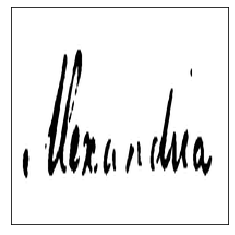

In [75]:
# files where keywords for validation are located
VALID_DOCUMENT_IDS = get_file('valid.txt')
# files where keywords for training are located
TRAIN_DOCUMENT_IDS = get_file('train.txt')
# list of words which are present in the training set and also in the valid set
KEYWORDS = get_file('keywords.txt')
# dict of images with pages and image as np array
IMAGES = import_images()

transcript_list = get_file('ground-truth/transcription.txt')
# final transcript with all infos about words
TRANSCRIPT = parse_transcript(transcript_list)

## the id for IMAGES corresponds to the word in TRANSCRIPT. so IMAGES[1] is the word in TRANSCRIPT[1]

print(TRANSCRIPT[872])
display_image(IMAGES[872]['image'])


In [27]:
# iterate keywords
# pseudo-code idea

from dtaidistance import dtw

# compare keyword to all other words
series = [
    np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double),
    np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.0, 0, 1, 2, 1, 0, 0, 0])]
ds = dtw.distance_matrix_fast(series)

print(ds)

asdf = [1,2,3,4]
print(asdf[1:3])

(3, 3)
[[       inf 1.41421356 1.        ]
 [       inf        inf 1.        ]
 [       inf        inf        inf]]
[2, 3]


## Testing

[872, 2007]
[{'document': '273', 'line': '23', 'col': '05', 'word': 'A-l-e-x-a-n-d-r-i-a'}]


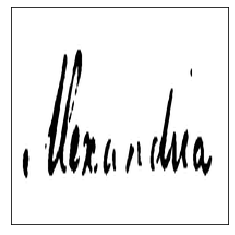

In [76]:
ids_ = find_by_word(TRANSCRIPT, 'A-l-e-x-a-n-d-r-i-a')
print(ids_)

print([TRANSCRIPT[ids_[0]]])
display_image(IMAGES[ids_[0]]['image'])



In [65]:
image1 = np.concatenate(IMAGES[0]['image'])
images = [np.concatenate(image['image']) for image in IMAGES[15:20]]
print(image1)

nice_results = list()
import time
image1 = np.array(image1, dtype=np.double)
start = time.time()
for image in images:
    print(image)
    distance = dtw.distance_fast(image1, np.array(image, dtype=np.double))
    if distance < 4000:
        nice_results.append({"one": image, "two": image1})
    print(distance)
end = time.time()
print("took: " + str(round(end - start, 2)) + " seconds")
print()
    

[255 255 255 ... 255 255 255]
[255 255 255 ... 255 255 255]
5316.080416998975
[255 255 255 ... 255 255 255]
2560.117575425004
[255 255 255 ... 255 255 255]
3771.069344363744
[255 255 255 ... 255 255 255]
9150.510204354729
[255 255 255 ... 255 255 255]
3186.144535327925
took: 31.25 seconds


In [ ]:
images = [np.array(np.concatenate(image['image']), dtype=np.double) for image in IMAGES[:20]]
series = [
    np.array([0, 0, 1, 2, 1, 0, 1, 0, 0], dtype=np.double),
    np.array([0.0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0]),
    np.array([0.0, 0, 1, 2, 1, 0, 0, 0])
]
ds = dtw.distance_matrix_fast(series)

### **dtaidistance:** fancy pantsy library for DTW
##### Installation:
`pip install dtaidistance`  
**github:** [github-repo for dtaidistance](https://github.com/wannesm/dtaidistance)

In [ ]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
x = np.arange(0, 20, .5)
s1 = np.sin(x)
s2 = np.sin(x - 1)
d, paths = dtw.warping_paths(s1, s2, window=25, psi=2)
best_path = dtw.best_path(paths)
dtwvis.plot_warpingpaths(s1, s2, paths, best_path)


In [41]:
print(len(IMAGES))

3726


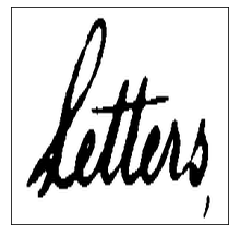

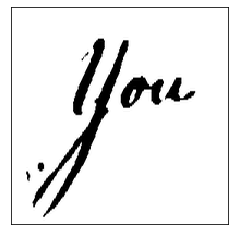

3186.144535327925


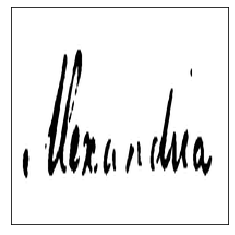

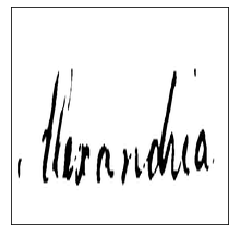

2959.583416631469


In [67]:
image1 = np.array(np.concatenate(IMAGES[0]['image']), dtype=np.float)
image2 = np.array(np.concatenate(IMAGES[19]['image']), dtype=np.float)
#print(IMAGES[872])
#print(IMAGES[2007])

display_image(IMAGES[1]['image'])
display_image(IMAGES[19]['image'])
distance = dtw.distance_fast(image1, image2)
print(distance)

image1 = np.array(np.concatenate(IMAGES[872]['image']), dtype=np.float)
image2 = np.array(np.concatenate(IMAGES[2007]['image']), dtype=np.float)
#print(IMAGES[872])
#print(IMAGES[2007])

display_image(IMAGES[872]['image'])
display_image(IMAGES[2007]['image'])
distance = dtw.distance_fast(image1, image2)
print(distance)


### DTW required steps
- [ ] initialize matrix
- [ ] calculate each field in the matrix
- [ ] find the shortest path from 0,0 to i,j through the matrix by iterating and increasing either i, j or both
##### Efficiency
- [ ] only calculate matrix fields within a certain treshold (Sakoe-Chiba Band)

In [ ]:
### Custom DTW
def dtw(s, t):
    n, m = len(s), len(t)
    dtw_matrix = np.zeros((n+1, m+1))
    for i in range(n+1):
        for j in range(m+1):
            dtw_matrix[i, j] = np.inf
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(s[i-1] - t[j-1])
            # take last min from a square box
            last_min = np.min([dtw_matrix[i-1, j], dtw_matrix[i, j-1], dtw_matrix[i-1, j-1]])
            dtw_matrix[i, j] = cost + last_min
    return dtw_matrix

In [ ]:
from PIL import Image
images = import_images()
print(len(images[0]))

# result = dtw([1,2,3], [2,2,2,2,3,4])
# print("result: " + str(result))
display_image(images[0])


#### Steps for the task
- get all images
- convert each image to a numpy array with dtype np.double

In [ ]:
from PIL import Image
import numpy as np

images = import_images()

print(np.asarray(images[0]))

display_image(images[0])